In [1]:
import pandas as pd
import seaborn as sns
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

# Model Selection via Regularization

## Problem 0

Load the dataset into Pandas data frame.

In [2]:
df = pd.read_csv('cars.csv')

### Part A

The dataset has 32 observations.

In [3]:
n = len(df)

In [4]:
n

32

### Part B

The dataset has the following columns.

In [5]:
cols = list(df.columns)

In [6]:
cols

['name',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb']

### Part C

Here is a scatter plot of each column against every other column pairwise.

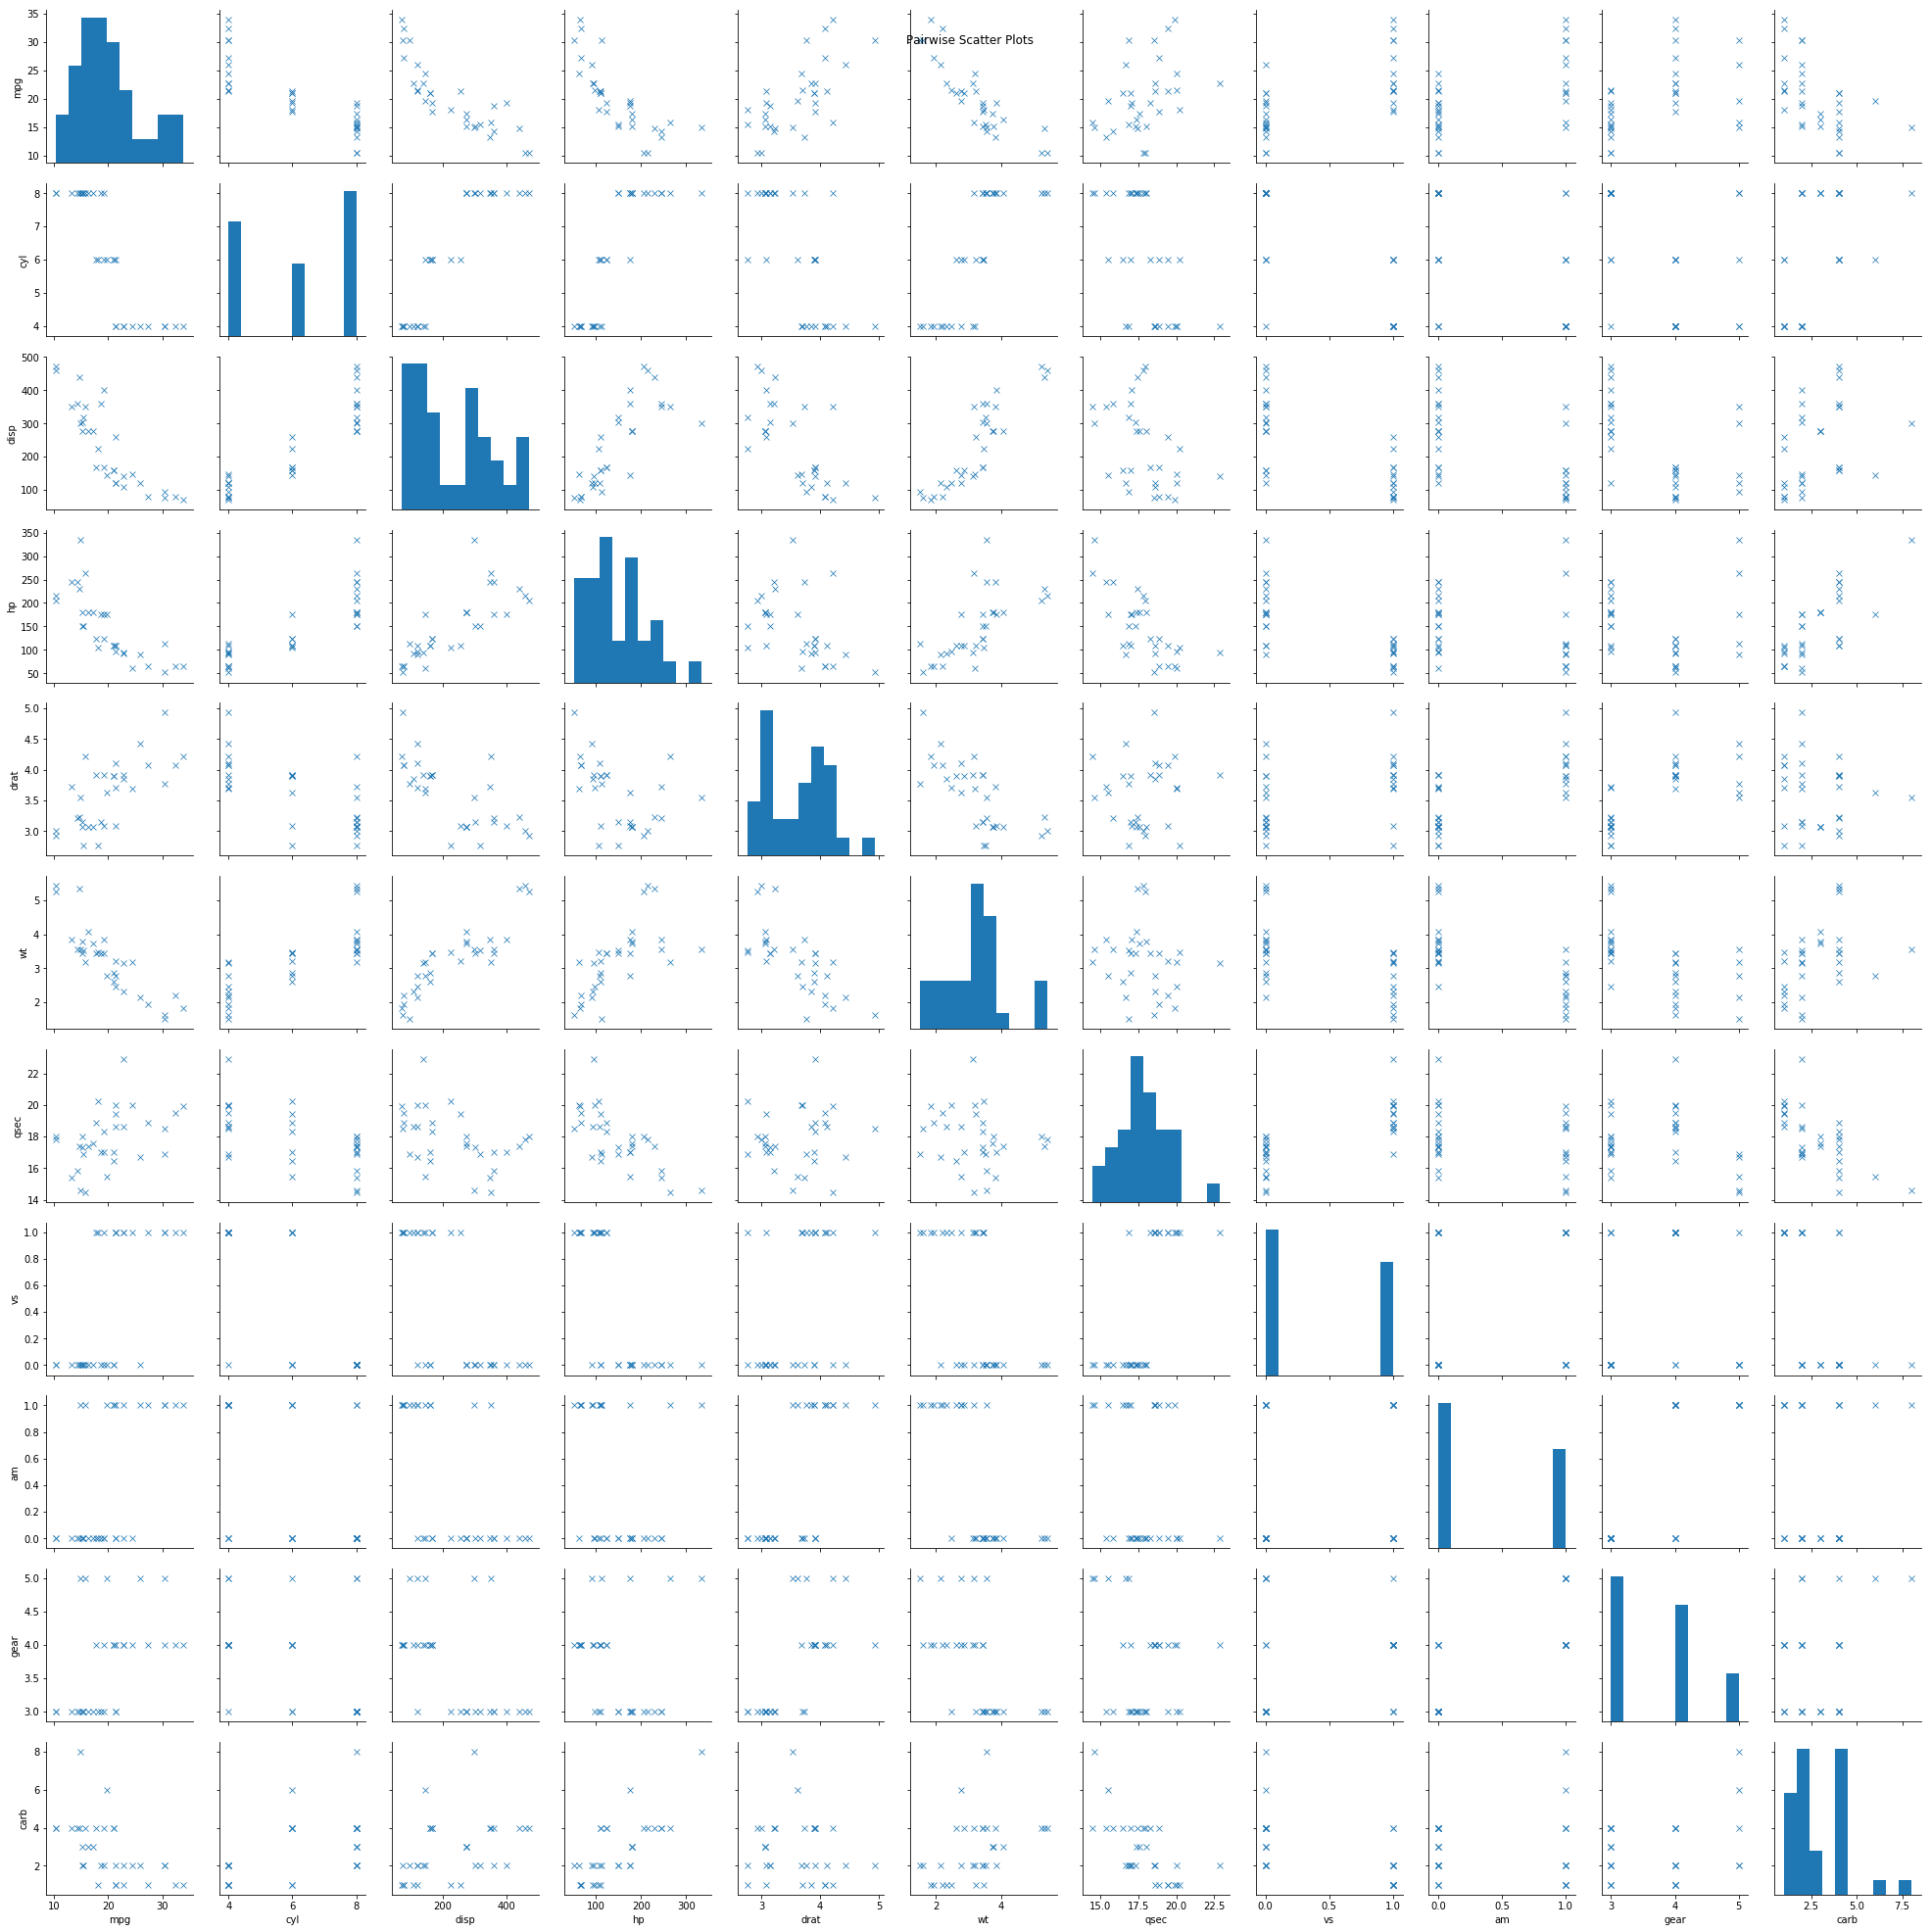

In [7]:
sns.pairplot(df, markers=['x'])
_ = plt.suptitle('Pairwise Scatter Plots')

### Part D

Here is a heatmap of the correlation matrix between all columns.

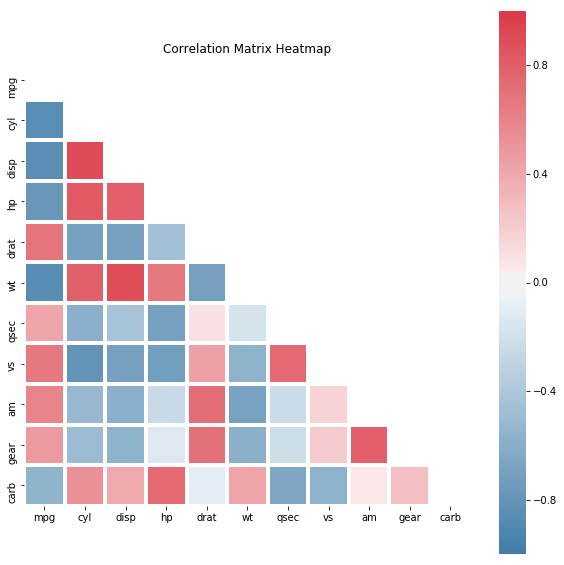

In [8]:
correlation = df.corr()

mask = np.zeros(correlation.shape, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))

sns.heatmap(correlation, mask=mask, cmap=sns.diverging_palette(240, 10, as_cmap=True), 
            vmin=-1, vmax=1, center=0, square=True, linewidths=3)

_ = plt.title('Correlation Matrix Heatmap')

### Part E

It appears like `wt`, `cyl`, and `disp` are the most linearly correlated with `mpg` with $R^2$ values greater than $0.70$. However, `hp` is still greater than $0.50$ so it might also be considered roughly linearly related. Below, we sort the columns in order of increasing $R^2$ value.

In [9]:
# Note the `i + 2` in the column index to skip both `name` and `mpg` columns.
# Note the `i + 1` in the correlation index to skip `mpg` (`name` is not in the correlation matrix).
{cols[i + 2]: correlation.values[i + 1, 0] ** 2 for i in reversed(np.argsort(correlation.values[1:, 0] ** 2))}

{'wt': 0.7528327936582645,
 'cyl': 0.7261800050938042,
 'disp': 0.7183433404897296,
 'hp': 0.6024373414239339,
 'drat': 0.4639951679850863,
 'vs': 0.44094768611614193,
 'am': 0.35979894342546487,
 'carb': 0.3035184370544295,
 'gear': 0.23067344813203047,
 'qsec': 0.17529632026101274}

## Problem 1

### Part A

Using all the variables, we create an ordinary least squares regression model.

In [10]:
ridge_model = sm.OLS(df['mpg'], sm.add_constant(df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Part B

Now, we create a function to get the ridge-regularized fitting results of a model.

In [11]:
def get_ridge_results(ridge_model, alpha):
    """Fits a `statsmodels.OLS` model using ridge regression with an L2
    penalty of `alpha` weight.
    
    Args:
        ridge_model (OLS): A statsmodels OLS object to fit using ridge
            regression.
        alpha (float): A value to use as the L2 regularization penalty.
        
    Returns:
        RegularizedResults: A fitted OLS object using L2 penalty.
        
    """
    return ridge_model.fit_regularized(alpha=alpha, L1_wt=0.0)

### Part C

We use the above defined function to fit using L2 penalty for multiple `alpha` values saving the coefficient values along the way.

In [12]:
alphas = np.arange(0.1, 100.1, 0.1)
ridge_coeffs = np.zeros((alphas.shape[0], 11))

for i, alpha in enumerate(alphas):
    ridge_coeffs[i, :] = get_ridge_results(ridge_model, alpha).params

We can plot each of the coefficients for increasing values of `alpha`.

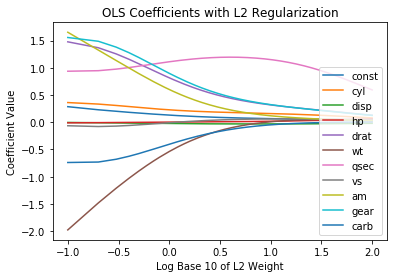

In [13]:
cols = [ 'const', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' ]

_, ax = plt.subplots()

for i in range(11):
    plt.plot(np.log10(alphas), ridge_coeffs[:, i], label=cols[i])

plt.title('OLS Coefficients with L2 Regularization')
plt.legend(loc=4)
plt.ylabel('Coefficient Value')
_ = plt.xlabel('Log Base 10 of L2 Weight')

### Part D

As the `alpha` increases, the coefficients are slowly pushed towards zero (mostly) monotonically. However, nearly all the values have at least some magnitude even for large `alpha`.

## Problem 2

### Part A

We recreate the same model of OLS as before.

In [14]:
lasso_model = sm.OLS(df['mpg'], sm.add_constant(df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]))

We slightly modify our `get_ridge_result` function to L1 loss exclusively.

In [15]:
def get_lasso_results(lasso_model, alpha):
    """Fits a `statsmodels.OLS` model using lasso regression with an L1
    penalty of `alpha` weight.
    
    Args:
        lasso_model (OLS): A statsmodels OLS object to fit using lasso
            regression.
        alpha (float): A value to use as the L1 regularization penalty.
        
    Returns:
        RegularizedResults: A fitted OLS object using L1 penalty.
        
    """
    return lasso_model.fit_regularized(alpha=alpha, L1_wt=1.0)

### Part B

We can repeat the same experiment above by fitting several lasso regression models for different `alpha` values.

In [16]:
alphas = np.arange(0.1, 100.1, 0.1)
lasso_coeffs = np.zeros((alphas.shape[0], 11))

for i, alpha in enumerate(alphas):
    lasso_coeffs[i, :] = get_lasso_results(lasso_model, alpha).params

We again plot the results of the coefficients for increasing `alpha`.

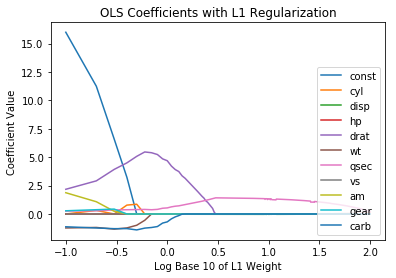

In [17]:
cols = [ 'const', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' ]

_, ax = plt.subplots()

for i in range(11):
    plt.plot(np.log10(alphas), lasso_coeffs[:, i], label=cols[i])

plt.title('OLS Coefficients with L1 Regularization')
plt.legend(loc=4)
plt.ylabel('Coefficient Value')
_ = plt.xlabel('Log Base 10 of L1 Weight')

### Part C

As the regularization weight is increased, the coefficients still tend towards zero. However, they decay much more quickly for smaller `alpha`. Furthermore, the decrease is much less smooth.

If you were trying to choose a model with as few features as is necessary, you would prefer to use L1 loss as many coefficients will tend towards $0$ for smaller `alpha`.